In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [2]:
Ved = pd.read_csv("Ved.csv", index_col= "Date", parse_dates= ["Date"])

In [4]:
Ved["log_ret"] = np.log(Ved.Price / Ved.Price.shift())
Ved

,Price,Returns,log_ret
Date,,,
2014-01-01,202.000000,NaN,NaN
2014-01-02,199.850006,-0.010644,-0.010701
2014-01-03,199.149994,-0.003503,-0.003509
2014-01-06,198.949997,-0.001004,-0.001005
2014-01-07,194.500000,-0.022367,-0.022621
...,...,...,...
2024-01-31,273.850006,0.028545,0.028145
2024-02-01,268.500000,-0.019536,-0.019730
2024-02-02,272.549988,0.015084,0.014971


# Rolling Statistics
 (Another) general Rule in finance/investing: Past performance is not an indicator of future performance.

In [7]:
ann_mu = Ved.log_ret.mean()*252 # annualized mean return
ann_mu

0.03412416002449454

In [8]:
ann_std = Ved.log_ret.std()*np.sqrt(252) # annalized std of returns (Alt 1)
ann_std

0.44875897770498135

### Are return and risk constant over time? No, of course not! They change over time.

Let's measure/quantify this with rolling statistics!

In [9]:
window = 252 #rolling window 252 trading days (~ 1 year)

In [11]:
Ved.log_ret.rolling(window = 252)

Rolling [window=252,center=False,axis=0,method=single]

In [12]:
Ved.log_ret.rolling(window = 252).sum() # Alt 1

Date
2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
                ...   
2024-01-31   -0.189236
2024-02-01   -0.203663
2024-02-02   -0.190209
2024-02-05   -0.175997
2024-02-06   -0.122093
Name: log_ret, Length: 2491, dtype: float64

In [14]:
roll_mean = Ved.log_ret.rolling(window = 252).mean()*252 #Alt 2
roll_mean

Date
2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
                ...   
2024-01-31   -0.189236
2024-02-01   -0.203663
2024-02-02   -0.190209
2024-02-05   -0.175997
2024-02-06   -0.122093
Name: log_ret, Length: 2491, dtype: float64

In [15]:
roll_mean.iloc[250:]

Date
2015-01-09         NaN
2015-01-12         NaN
2015-01-13    0.012789
2015-01-14   -0.060593
2015-01-15   -0.048614
                ...   
2024-01-31   -0.189236
2024-02-01   -0.203663
2024-02-02   -0.190209
2024-02-05   -0.175997
2024-02-06   -0.122093
Name: log_ret, Length: 2241, dtype: float64

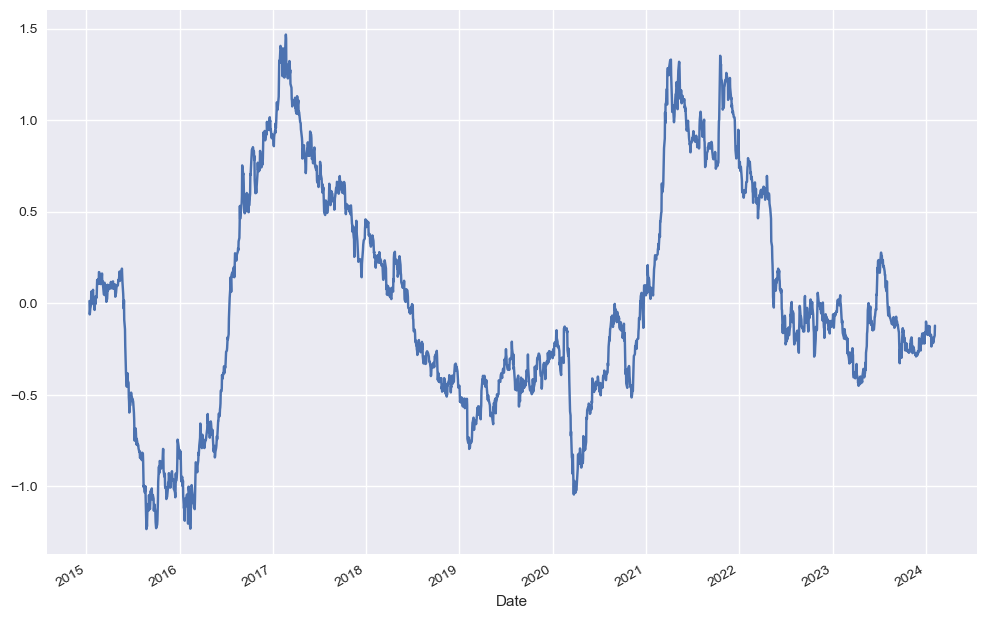

In [16]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [17]:
roll_std = Ved.log_ret.rolling(window = 252).std()*np.sqrt(252)
roll_std

Date
2014-01-01        NaN
2014-01-02        NaN
2014-01-03        NaN
2014-01-06        NaN
2014-01-07        NaN
               ...   
2024-01-31   0.294653
2024-02-01   0.295229
2024-02-02   0.295642
2024-02-05   0.295519
2024-02-06   0.296875
Name: log_ret, Length: 2491, dtype: float64

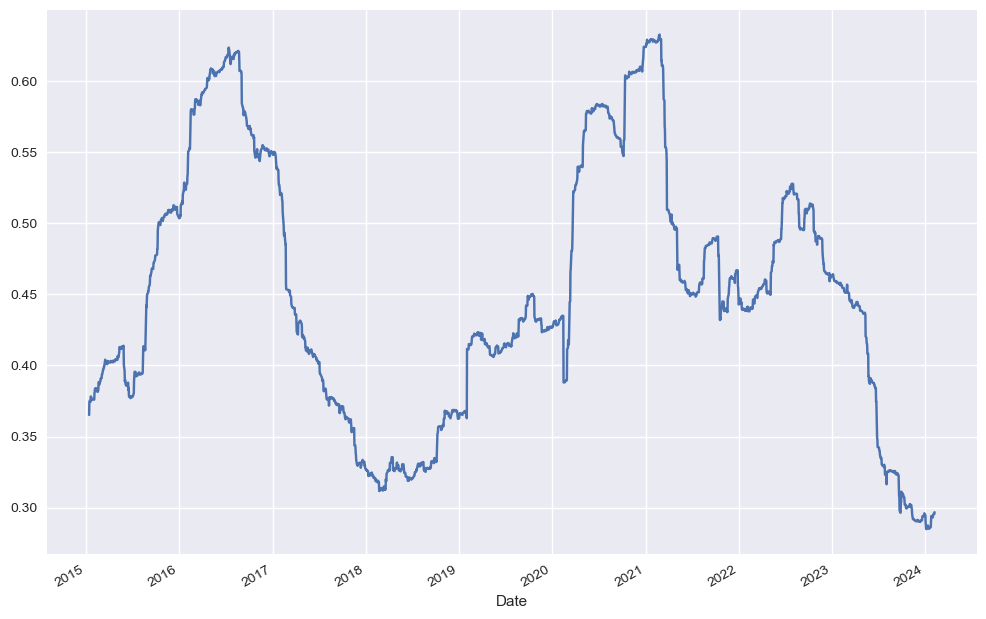

In [18]:
roll_std.plot(figsize = (12,8))
plt.show()

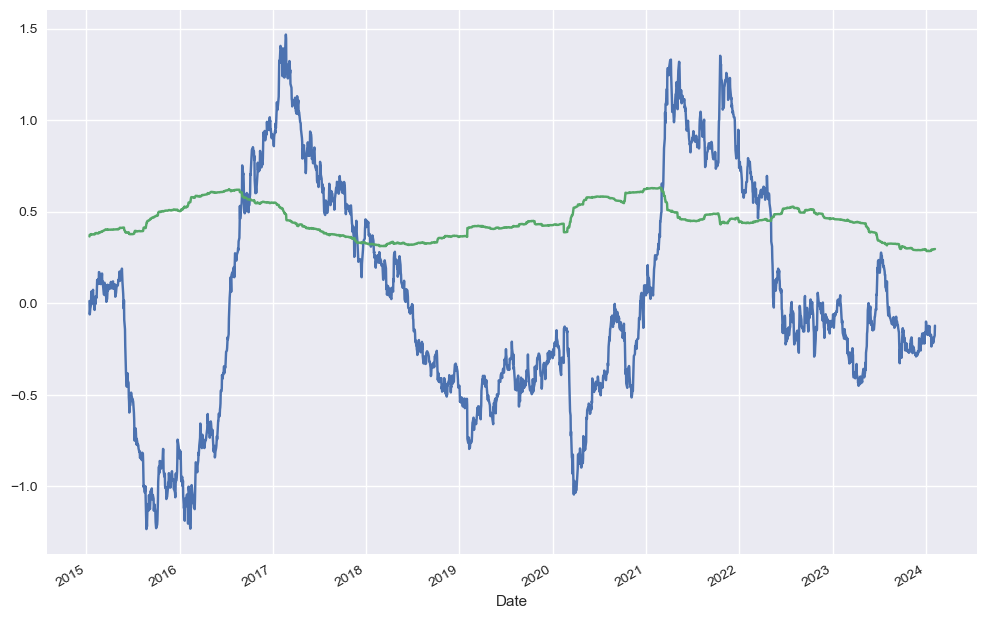

In [19]:
roll_mean.plot(figsize = (12,8))
roll_std.plot()
plt.show()

 ### Take Home: Be careful, you'll always find (sub-)periods with low returns & high risk and high returns & low risk.
     . Analysis Period must be sufficiently long to reduce impact of random noise.
     . Analysis period should be as short as possible and should only include the latest trends/regimes.
     . Commonly used reporting period: 3 years / 36 Months

# Another Example: Simple Moving Average (Prices) - SMA

In [20]:
sma_window = 50

<Axes: xlabel='Date'>

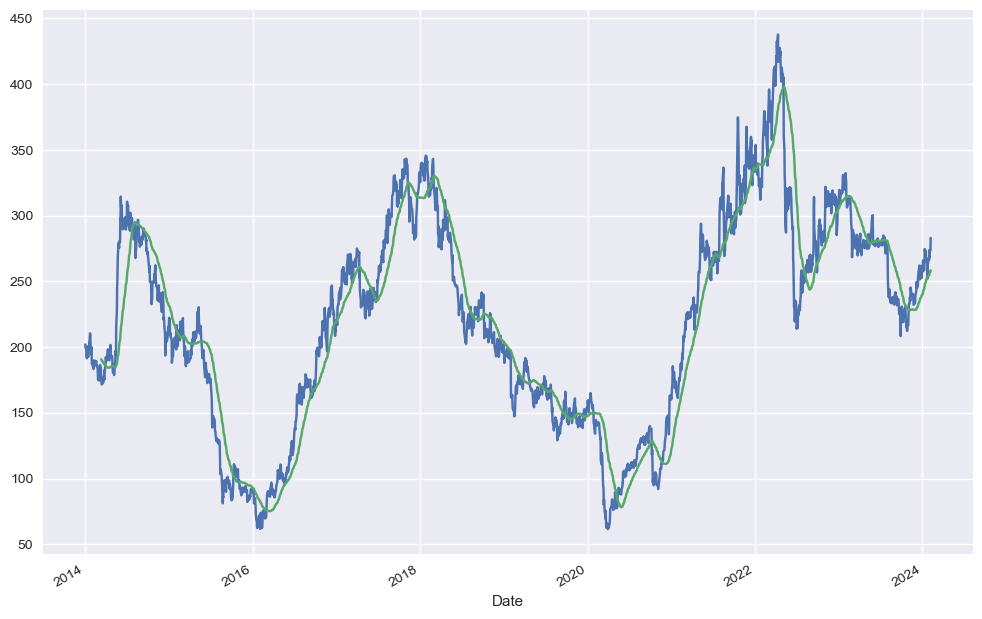

In [22]:
Ved.Price.plot(figsize = (12, 8))
Ved.Price.rolling(sma_window).mean().plot()